# Wine Data Set

Analyze a dataset containing 13 chemical measurements on 178 Italian wine samples.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

### Load the Data

In [3]:
# load the data
cols = [
    'cultivars',
    'alcohol',
    'malic acid',
    'ash',
    'alcalinity of ash',
    'magnesium',
    'total phenols',
    'flavanoids',
    'nonflavanoid phenols',
    'proanthocyanins',
    'color intensity',
    'hue',
    'od280/od315 of diluted wines',
    'proline'
]

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=cols)

### Inspect the Data

In [4]:
# what data type do we have and is it all there>
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 14 columns):
cultivars                       178 non-null int64
alcohol                         178 non-null float64
malic acid                      178 non-null float64
ash                             178 non-null float64
alcalinity of ash               178 non-null float64
magnesium                       178 non-null int64
total phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315 of diluted wines    178 non-null float64
proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 20.9 KB


In [5]:
# what are the main central and spread properties of the data?
df.describe()

,cultivars,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,od280/od315 of diluted wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
# What does a record look like?
import random
df.ix[random.sample(df.index,10)]

,cultivars,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,od280/od315 of diluted wines,proline
84,2,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.050000,0.79,3.08,520
119,2,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.280000,0.93,3.05,564
85,2,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.620000,1.23,3.16,450
76,2,13.03,0.90,1.71,16.0,86,1.95,2.03,0.24,1.46,4.600000,1.19,2.48,392
123,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.600000,0.73,3.10,380
96,2,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.500000,0.95,2.26,625
171,3,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470
147,3,12.87,4.61,2.48,21.5,86,1.70,0.65,0.47,0.86,7.650000,0.54,1.86,625
18,1,14.19,1.59,2.48,16.5,108,3.30,3.93,0.32,1.86,8.700000,1.23,2.82,1680
33,1,13.76,1.53,2.70,19.5,132,2.95,2.74,0.50,1.35,5.400000,1.25,3.00,1235


In [7]:
# How is the dataset organised / ordered?
df.head(5)

,cultivars,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,od280/od315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
df.tail(5)

,cultivars,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,od280/od315 of diluted wines,proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


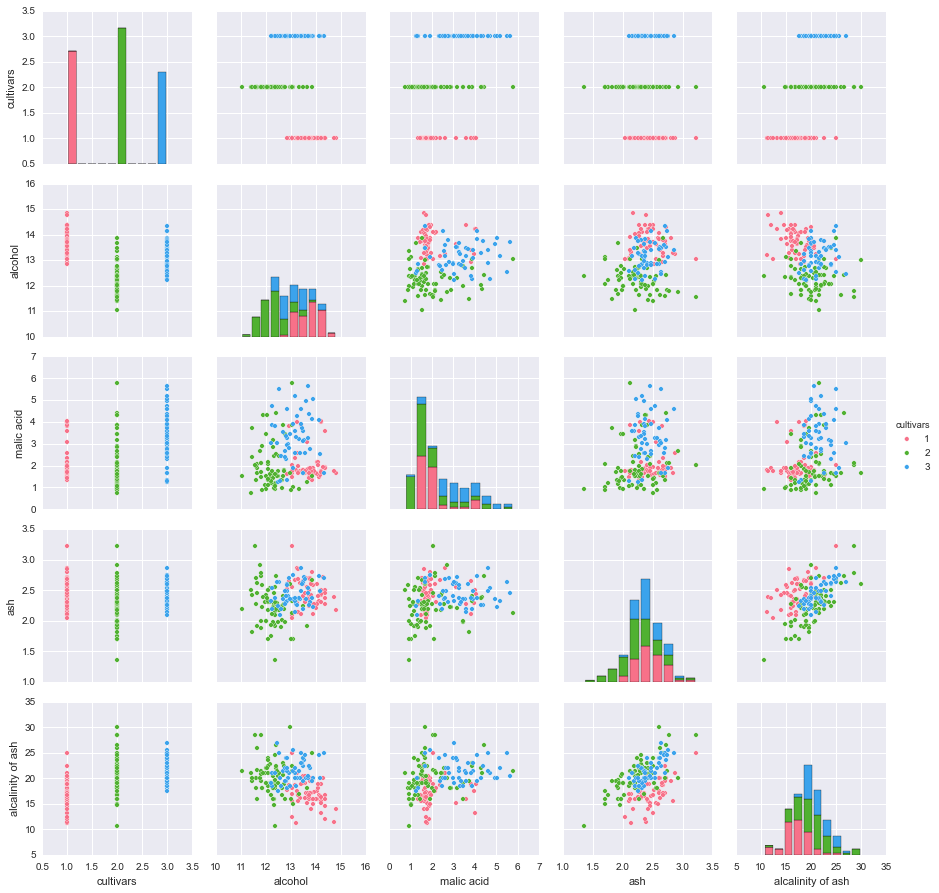

In [35]:
# How do the features relate to one another
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.pairplot(df.ix[:,:5], hue="cultivars", palette="husl")

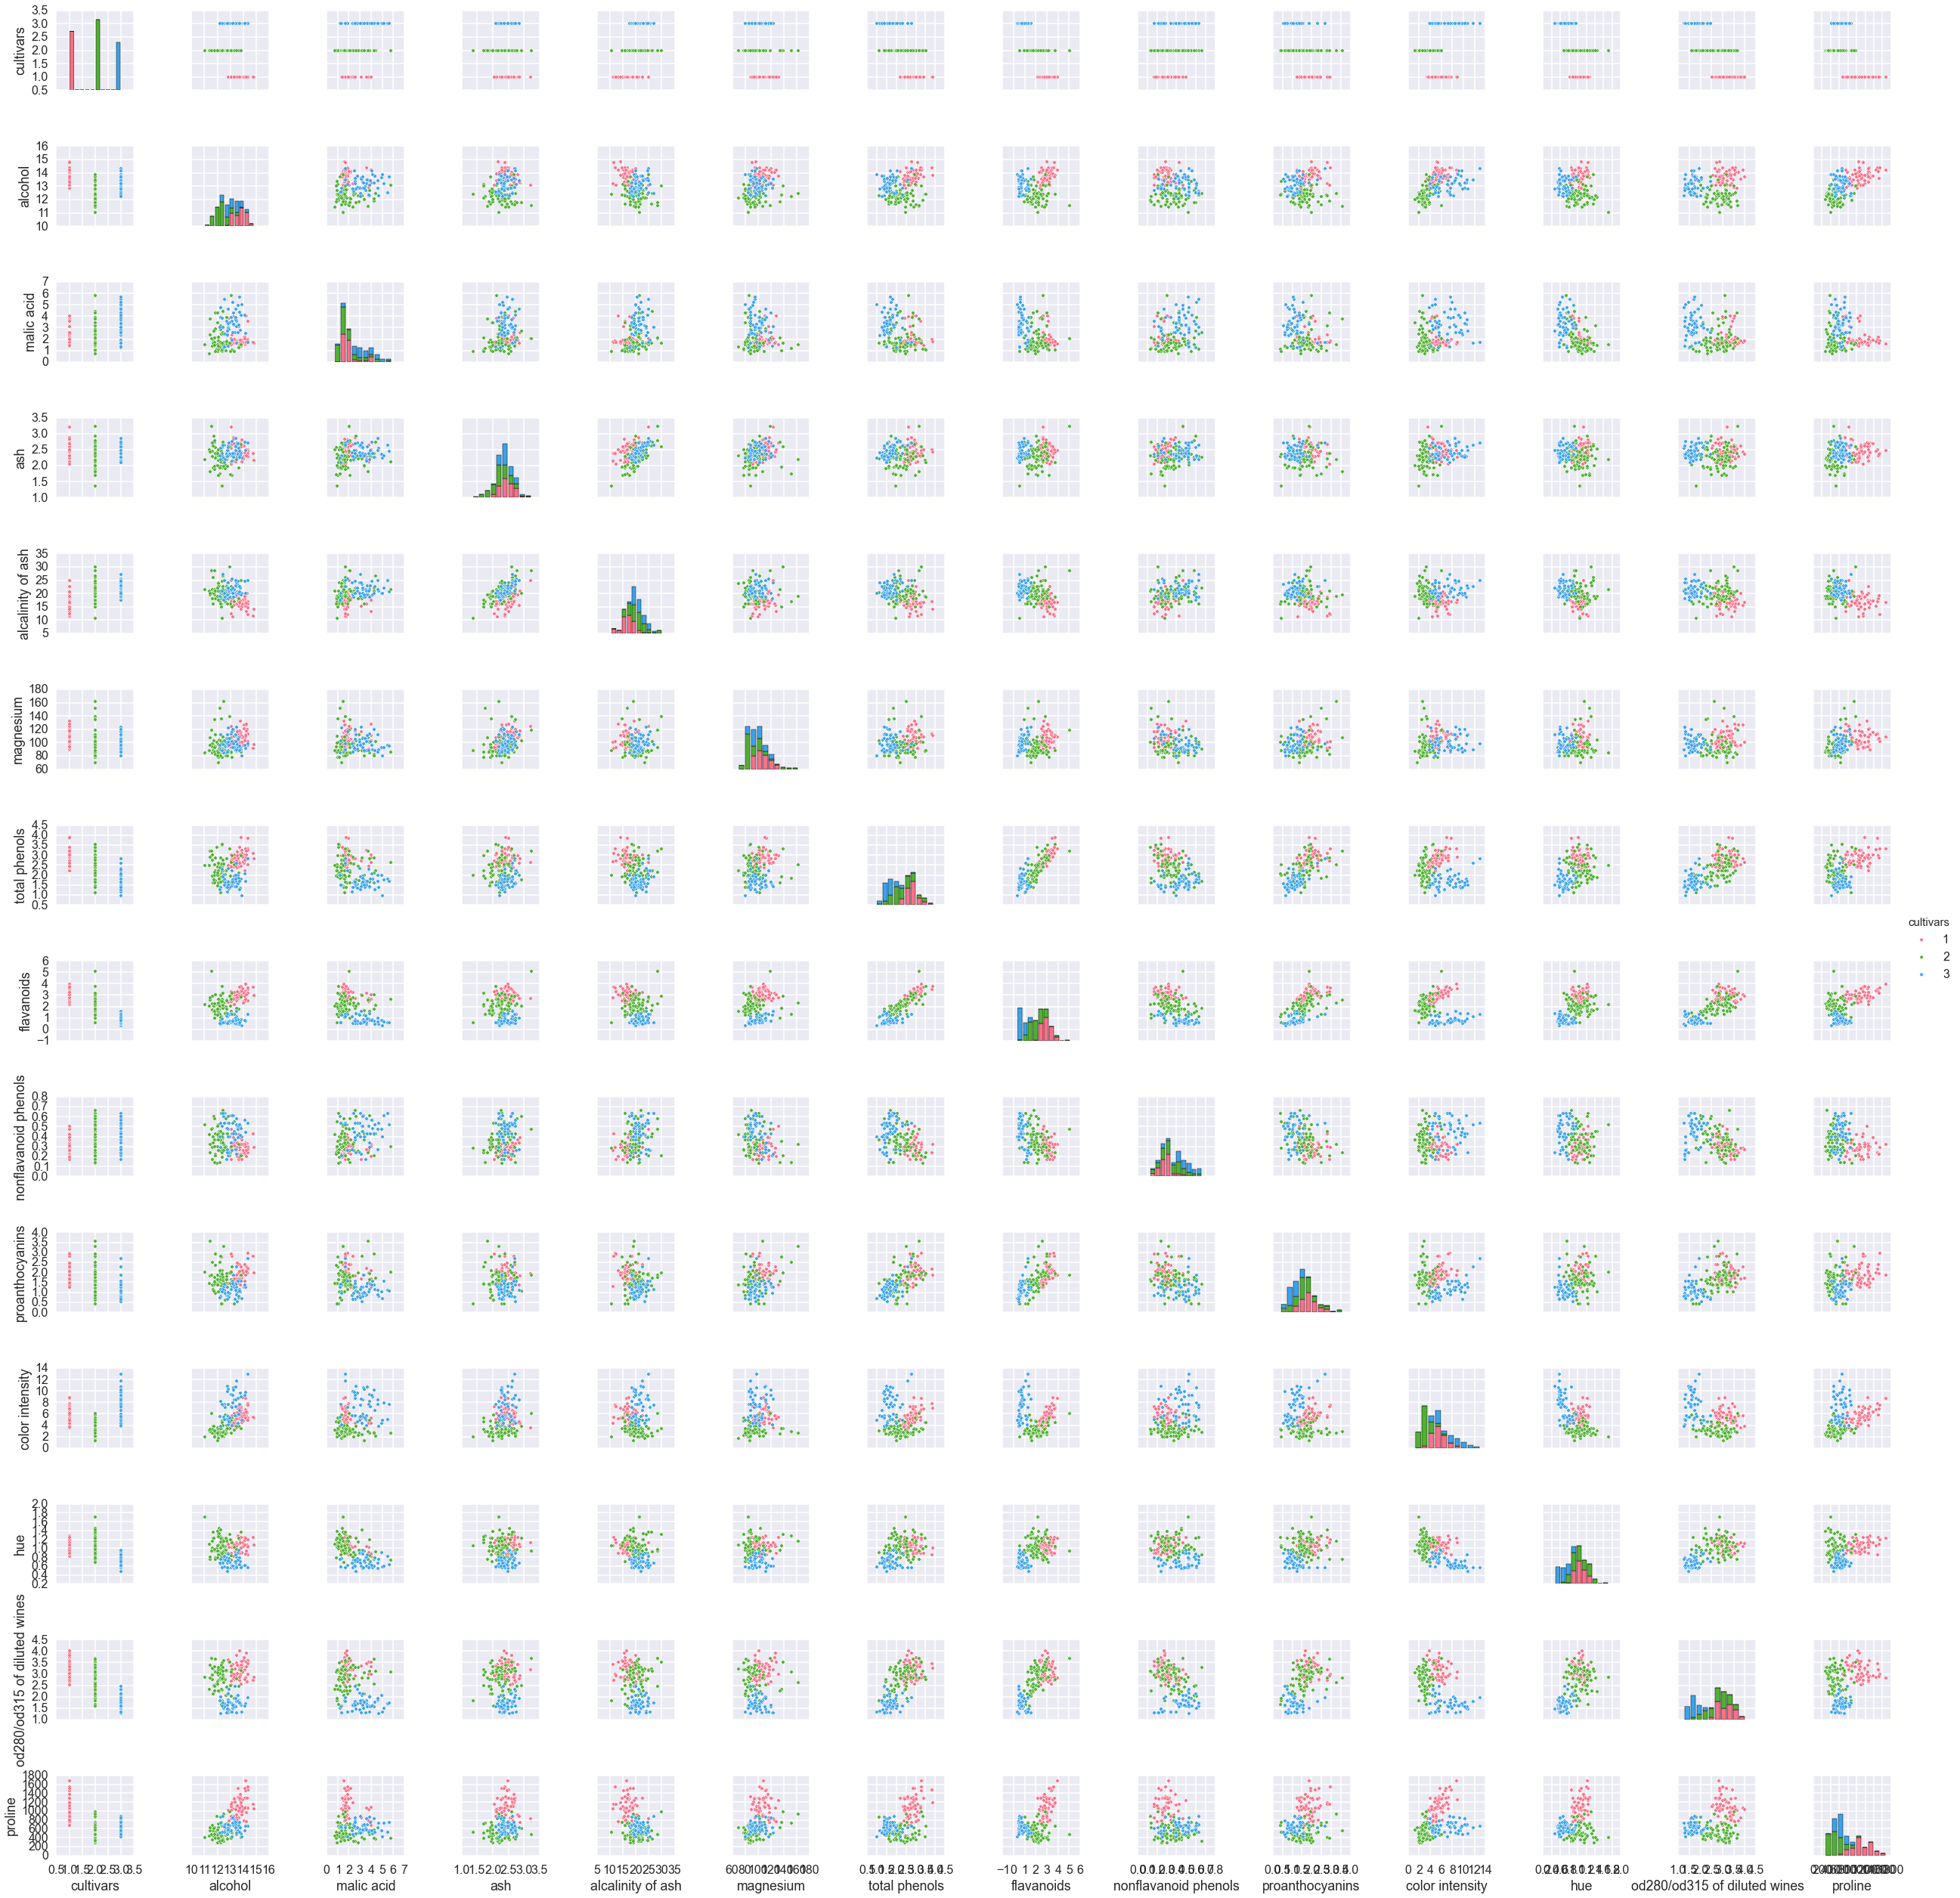

In [15]:
with sns.plotting_context('poster'):
    g = sns.pairplot(df, hue="cultivars", palette="husl")

### What is the optimal number of clusters?

In [114]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix

y = df.cultivars

df_norm = (df - df.mean()) / df.std()
X = df_norm.ix[:,1:].values

In [115]:
k_limit = min(100, int(np.sqrt(len(X))))
scores = []
for k in range(2, k_limit):
    cls = KMeans(n_clusters=k, random_state=1, n_init=25).fit(X)
    labels = cls.labels_
    score = silhouette_score(X, labels, metric='euclidean')
    scores.append((k,score))    

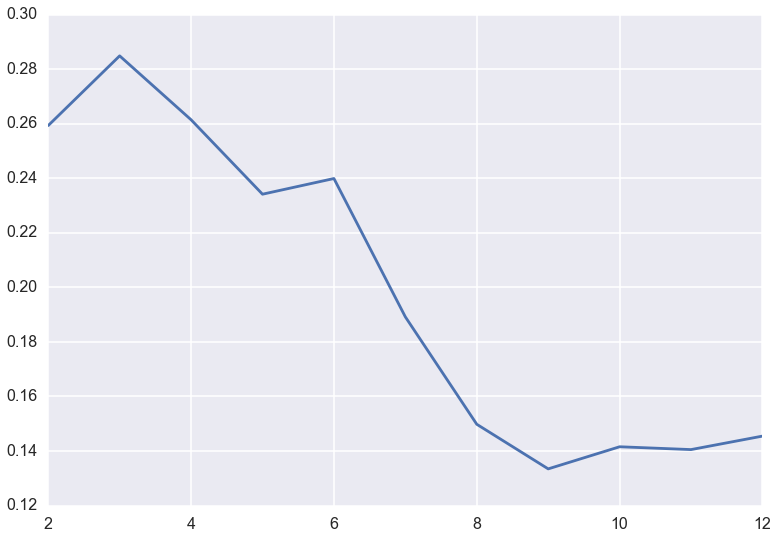

In [116]:
(x,y) = zip(*scores)
with sns.plotting_context('poster'):
    plt.plot(x,y);

In [117]:
# Best value of K is
best_k = x[np.argmax(y)]
best_k

3

### What determines what clusters consist of?

In [126]:
cls = KMeans(n_clusters=best_k, random_state=1, n_init=25).fit(X)
labels = cls.labels_

In [133]:
df['cluster'] = cls.labels_ 

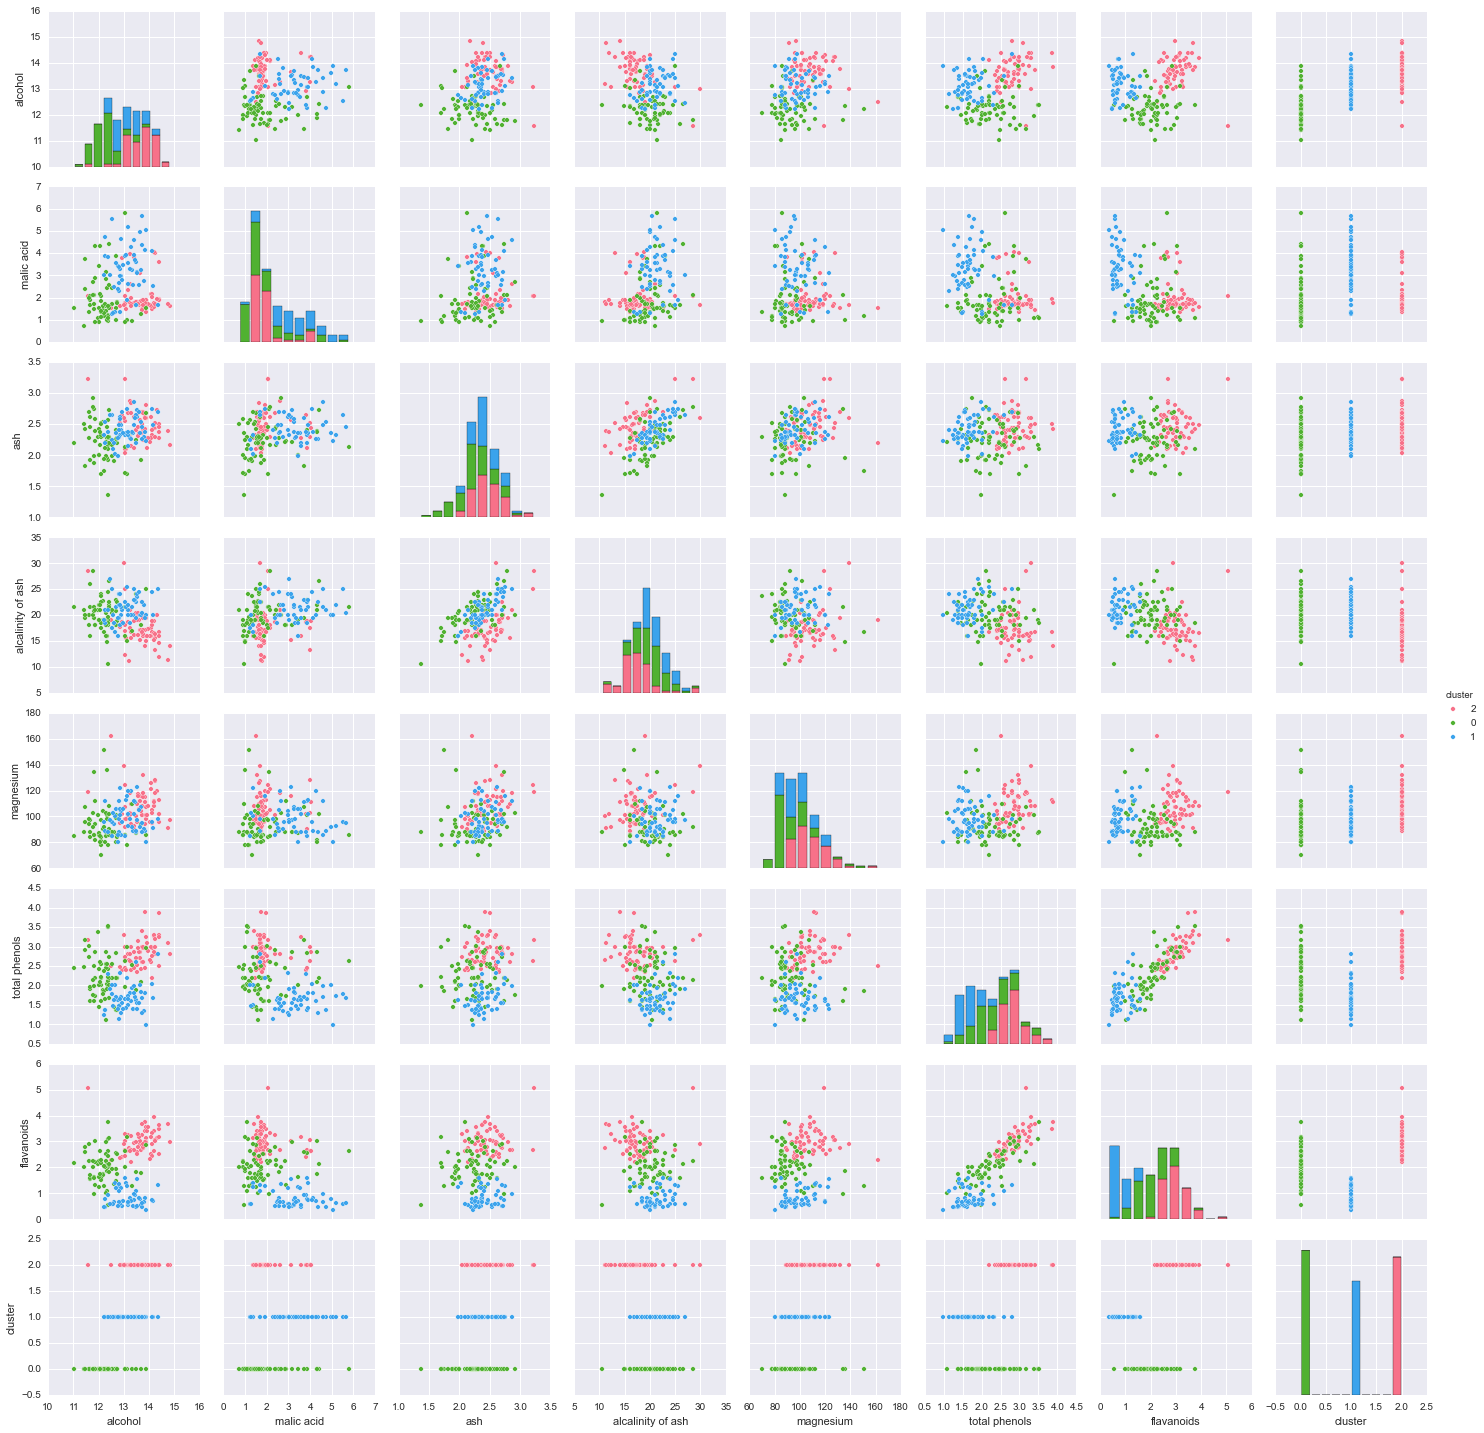

In [149]:
cols = df.columns[1:8].tolist() + ['cluster']
g = sns.pairplot(df[cols], hue="cluster", palette="husl")

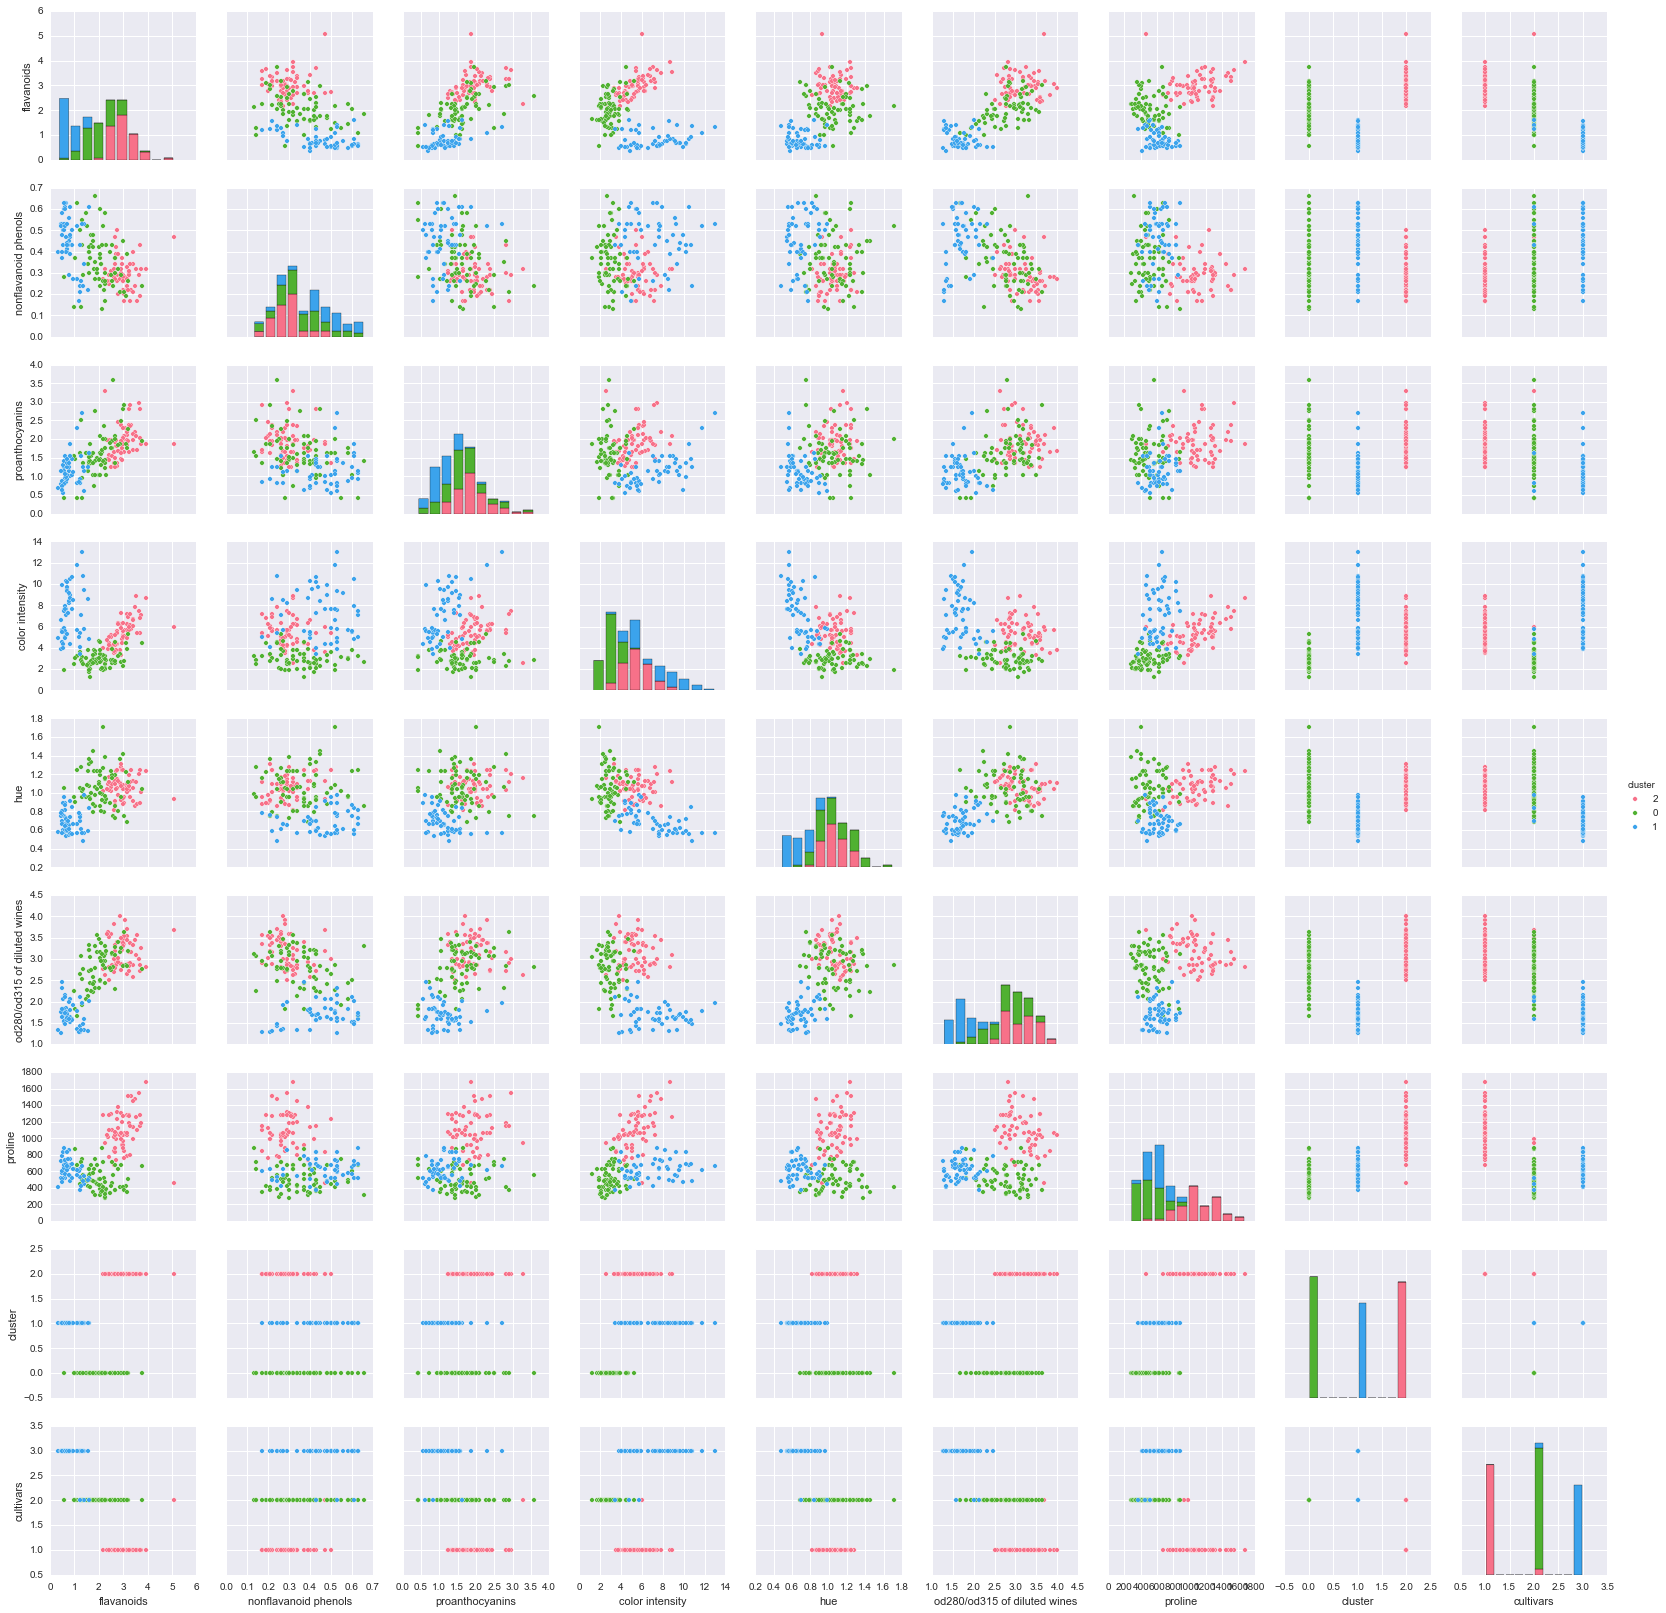

In [148]:
cols = df.columns[7:].tolist() + ['cultivars']
g = sns.pairplot(df[cols], hue="cluster", palette="husl")

### How well did the K-means clustering uncover the actual structure of the data contained in the first column?

In [98]:
actual = y - 1

In [99]:
m = confusion_matrix(actual, labels)

In [111]:
m

array([[ 0,  0, 59],
       [65,  3,  3],
       [ 0, 48,  0]])

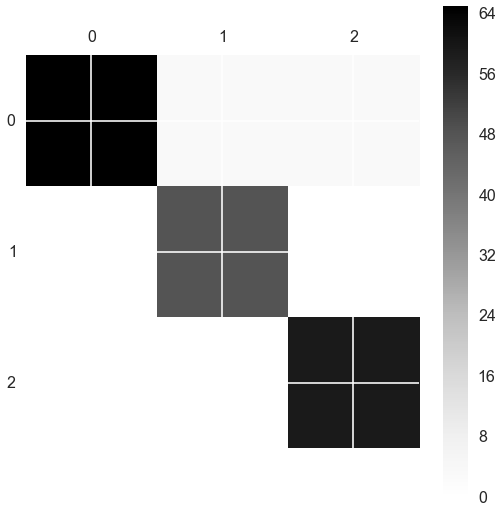

In [110]:
with sns.plotting_context('poster'):
    plt.matshow([m[1],m[2],m[0]])
    plt.colorbar()